# INTRODUCTION


---



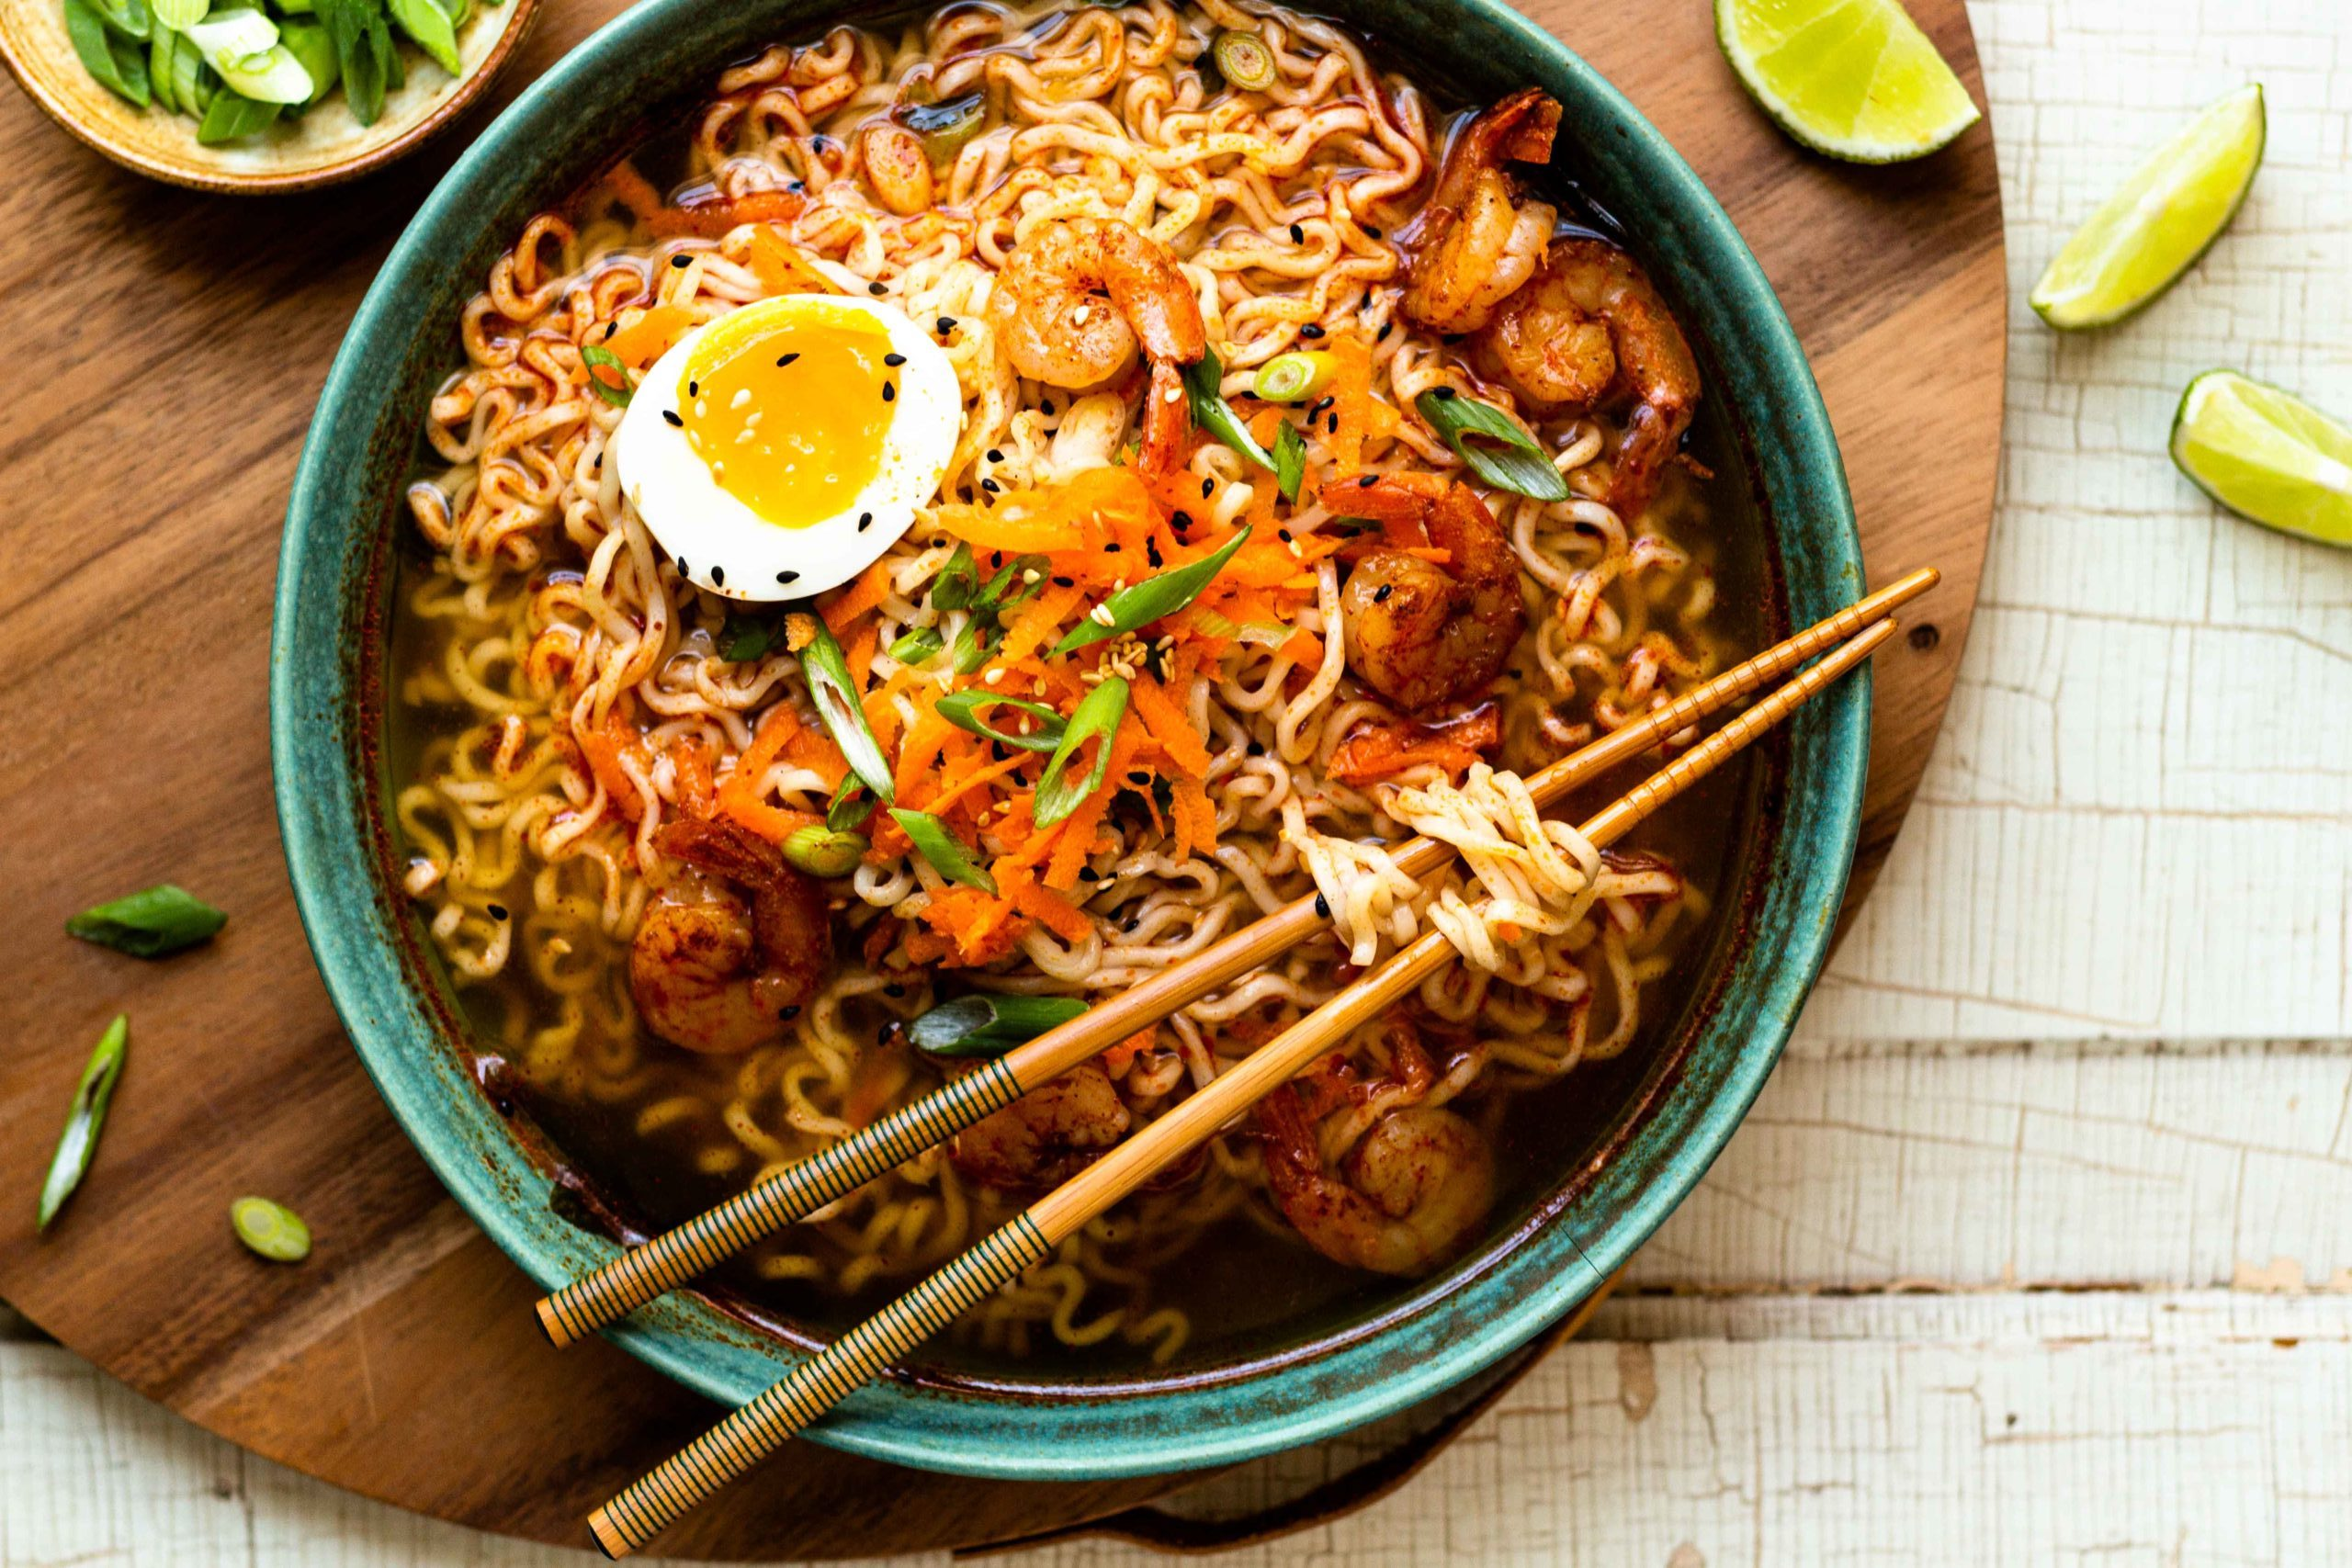

# DATASET PROBLEM

---



 This dataset contains information about **reviews of each ramen** from around the world.The goal is to create **Data Visualizations** that effectively communicate the information , allowing readers to quickly understand its contents. Additionally, A **Data Analysis** will be conducted to provide insights and explanations related to the visualizations.

# APPROACH

---




1. Import all the libraries
2. Load and Audit the data
3. Data preparation and Data Transformation
      1. Missing values: Impute all missing values using Mean,Median and Mode
      2. Inconistent values: Replace all inconsistence with consistent("NA" or "Unknown" )
      3. Outliers: Transform or let algorithm deal
4. Data Visualization
5. Data Analysis
      1. Uni-Variant Analysis(Mean,Median and Mode,Skewness)
      2. Bi-Varient Analysis(Correlation,Covariance,Chi-square test)
      3. Multi-Varient Analysis
          1. Regression:Not a regression problem
              1. Classification: Since outcome variable is Yes or No
              2. Apply decision Tree
              3. Evaluate between Logistic and Decision Tree which is the better model
       


# EXPLORATORY DATA ANALYSIS

---



IMPORTING LIBRARIES
---




In [1]:
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.feature_selection import chi2,f_classif,SelectKBest
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.neighbors import KNeighborsRegressor
from xgboost import XGBRegressor
from sklearn.model_selection import GridSearchCV

READING AND AUDITING DATASET
---

In [2]:
train=pd.read_csv("/content/ramen-ratings.csv")
train1=pd.read_csv("/content/ramen-ratings.csv")

In [3]:
train

,Review #,Brand,Variety,Style,Country,Stars,Top Ten
0,2580,New Touch,T's Restaurant Tantanmen,Cup,Japan,3.75,NaN
1,2579,Just Way,Noodles Spicy Hot Sesame Spicy Hot Sesame Guan...,Pack,Taiwan,1,NaN
2,2578,Nissin,Cup Noodles Chicken Vegetable,Cup,USA,2.25,NaN
3,2577,Wei Lih,GGE Ramen Snack Tomato Flavor,Pack,Taiwan,2.75,NaN
4,2576,Ching's Secret,Singapore Curry,Pack,India,3.75,NaN
...,...,...,...,...,...,...,...
2575,5,Vifon,"Hu Tiu Nam Vang [""Phnom Penh"" style] Asian Sty...",Bowl,Vietnam,3.5,NaN
2576,4,Wai Wai,Oriental Style Instant Noodles,Pack,Thailand,1,NaN
2577,3,Wai Wai,Tom Yum Shrimp,Pack,Thailand,2,NaN
2578,2,Wai Wai,Tom Yum Chili Flavor,Pack,Thailand,2,NaN


In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2580 entries, 0 to 2579
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Review #  2580 non-null   int64 
 1   Brand     2580 non-null   object
 2   Variety   2580 non-null   object
 3   Style     2578 non-null   object
 4   Country   2580 non-null   object
 5   Stars     2580 non-null   object
 6   Top Ten   41 non-null     object
dtypes: int64(1), object(6)
memory usage: 141.2+ KB


In [5]:
#Statistical Description for Numnerical Variable

train.describe()

,Review #
count,2580.000000
mean,1290.500000
std,744.926171
min,1.000000
25%,645.750000
50%,1290.500000
75%,1935.250000
max,2580.000000


In [6]:
train.skew()

<ipython-input-6-1d3a3c99b9d6>:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  train.skew()


Review #    0.0
dtype: float64

DATA PREPROCESSING
---



---



TREATING MISSING VALUES







In [7]:
train.isnull().sum()

Review #       0
Brand          0
Variety        0
Style          2
Country        0
Stars          0
Top Ten     2539
dtype: int64

From the above output, We can infer that :


*   'Top Ten' Column  has many missing values 
*   'Review #' Column also not required for the analysis

Hence we drop these columns.


In [8]:
train.drop(['Top Ten','Review #'],inplace = True,axis = 1)

In [9]:
#Checking whether the column removed or not
train

,Brand,Variety,Style,Country,Stars
0,New Touch,T's Restaurant Tantanmen,Cup,Japan,3.75
1,Just Way,Noodles Spicy Hot Sesame Spicy Hot Sesame Guan...,Pack,Taiwan,1
2,Nissin,Cup Noodles Chicken Vegetable,Cup,USA,2.25
3,Wei Lih,GGE Ramen Snack Tomato Flavor,Pack,Taiwan,2.75
4,Ching's Secret,Singapore Curry,Pack,India,3.75
...,...,...,...,...,...
2575,Vifon,"Hu Tiu Nam Vang [""Phnom Penh"" style] Asian Sty...",Bowl,Vietnam,3.5
2576,Wai Wai,Oriental Style Instant Noodles,Pack,Thailand,1
2577,Wai Wai,Tom Yum Shrimp,Pack,Thailand,2
2578,Wai Wai,Tom Yum Chili Flavor,Pack,Thailand,2


Since we have only 2 null values in 'Style' Column.Lets remove that as it does not affect the Accuracy

In [10]:
train.dropna(subset=['Style'],inplace=True)

In [11]:
print('Before:')
print(train1.shape)
print('After:')
print(train.shape)

Before:
(2580, 7)
After:
(2578, 5)


In [12]:
train.isnull().sum()

Brand      0
Variety    0
Style      0
Country    0
Stars      0
dtype: int64

**AUDITING THE  'STAR' COLUMN:**



The column 'Stars' denotes the rating of the ramen but it is in **object** datatype.
Inorder to use the column lets study the column then convert into **float** datatype

In [13]:
train.Stars.nunique()

51

In [14]:
train['Stars'].value_counts()

4          384
5          369
3.75       349
3.5        326
3          172
3.25       170
4.25       143
4.5        132
2.75        85
2           68
2.5         67
4.75        64
1.5         37
1.75        27
1           26
0           26
2.25        21
0.5         14
0.25        11
1.25        10
5.0         10
3.50         9
5.00         7
4.00         6
4.3          4
3.8          3
4.0          3
4.50         3
Unrated      3
1.1          2
2.8          2
2.9          2
4.125        2
2.3          2
3.1          2
3.0          2
2.1          1
0.9          1
0.75         1
3.125        1
2.125        1
3.00         1
0.1          1
3.3          1
3.7          1
3.4          1
3.6          1
2.85         1
3.2          1
3.65         1
1.8          1
Name: Stars, dtype: int64

In [15]:
train['Stars'].replace('Unrated', '0', inplace = True)
train['Stars'] = train.Stars.astype('float64')

In [16]:
#Checking 

train['Stars'].value_counts()

4.000    393
5.000    386
3.750    349
3.500    335
3.000    175
3.250    170
4.250    143
4.500    135
2.750     85
2.000     68
2.500     67
4.750     64
1.500     37
0.000     29
1.750     27
1.000     26
2.250     21
0.500     14
0.250     11
1.250     10
4.300      4
3.800      3
2.300      2
2.800      2
1.100      2
3.100      2
4.125      2
2.900      2
3.650      1
3.200      1
2.850      1
3.600      1
3.400      1
3.700      1
3.300      1
0.100      1
2.125      1
3.125      1
0.900      1
2.100      1
0.750      1
1.800      1
Name: Stars, dtype: int64

In [17]:
#To understand the data much better,lets convert the 'Star' to 'Rating'

train.rename(columns = {'Stars':'Rating'}, inplace = True)

In [18]:
train.dtypes

Brand       object
Variety     object
Style       object
Country     object
Rating     float64
dtype: object

AUDITING THE **'COUNTRY'** COLUMN:

In [19]:
#Checking
train['Country'].value_counts()

Japan            352
USA              323
South Korea      309
Taiwan           223
Thailand         191
China            168
Malaysia         156
Hong Kong        137
Indonesia        126
Singapore        109
Vietnam          108
UK                69
Philippines       47
Canada            41
India             31
Germany           27
Mexico            25
Australia         22
Netherlands       15
Myanmar           14
Nepal             14
Pakistan           9
Hungary            9
Bangladesh         7
Colombia           6
Brazil             5
Cambodia           5
Fiji               4
Holland            4
Poland             4
Finland            3
Sarawak            3
Sweden             3
Dubai              3
Ghana              2
Estonia            2
Nigeria            1
United States      1
Name: Country, dtype: int64

In [20]:
train.Country.nunique

<bound method IndexOpsMixin.nunique of 0          Japan
1         Taiwan
2            USA
3         Taiwan
4          India
          ...   
2575     Vietnam
2576    Thailand
2577    Thailand
2578    Thailand
2579         USA
Name: Country, Length: 2578, dtype: object>

In [21]:
train['Country'].value_counts()

Japan            352
USA              323
South Korea      309
Taiwan           223
Thailand         191
China            168
Malaysia         156
Hong Kong        137
Indonesia        126
Singapore        109
Vietnam          108
UK                69
Philippines       47
Canada            41
India             31
Germany           27
Mexico            25
Australia         22
Netherlands       15
Myanmar           14
Nepal             14
Pakistan           9
Hungary            9
Bangladesh         7
Colombia           6
Brazil             5
Cambodia           5
Fiji               4
Holland            4
Poland             4
Finland            3
Sarawak            3
Sweden             3
Dubai              3
Ghana              2
Estonia            2
Nigeria            1
United States      1
Name: Country, dtype: int64

From above,We can infer that there is duplicate values of 'Unites States' and 'US'

In [22]:
train['Country'].replace('United States','USA',inplace=True)

DATA VISUALISATION
---
---






CORRELATION

In [23]:
train.corr()

,Rating
Rating,1.0


<Axes: >

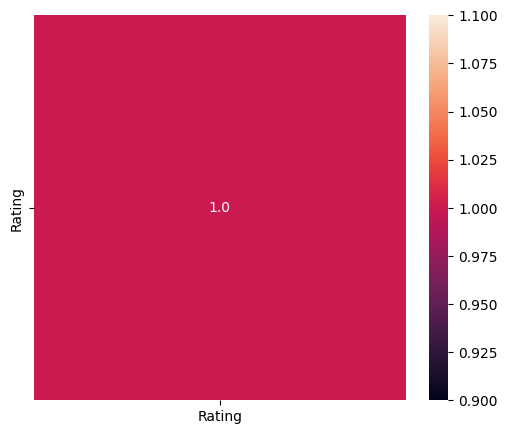

In [24]:
#heatmap construction: to understand the correlation between columns
plt.figure(figsize = (6,5))
sns.heatmap(train.corr(),annot = True,fmt ='0.1f')

OUTLIERS:

---



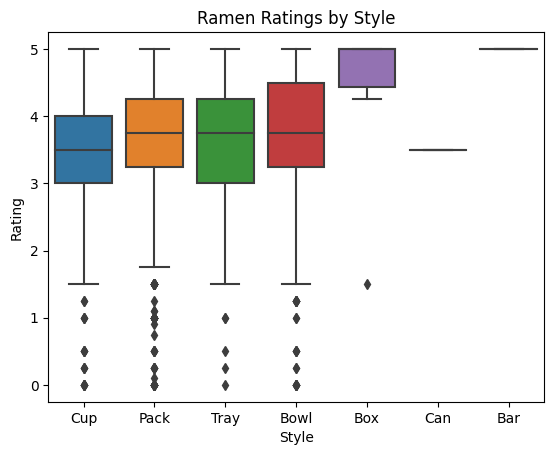

In [25]:
# Plot boxplot of ratings by style
sns.boxplot(data=train, x="Style", y="Rating")
plt.title("Ramen Ratings by Style")
plt.show()

EXPLORING DATA

---



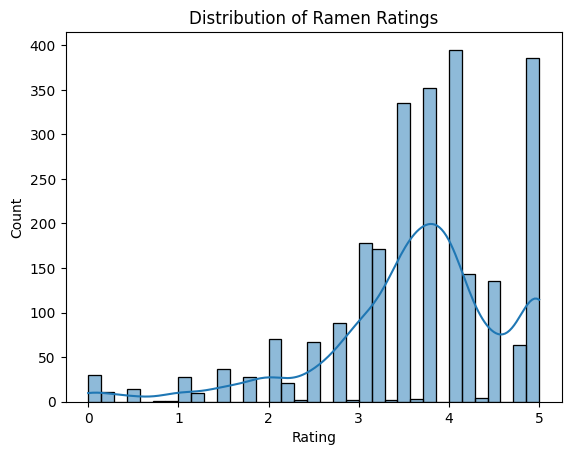

In [26]:
# Explore the distribution of the target variable (rating)
sns.histplot(data=train, x="Rating", kde=True)
plt.title("Distribution of Ramen Ratings")
plt.show()

<Axes: ylabel='Style'>

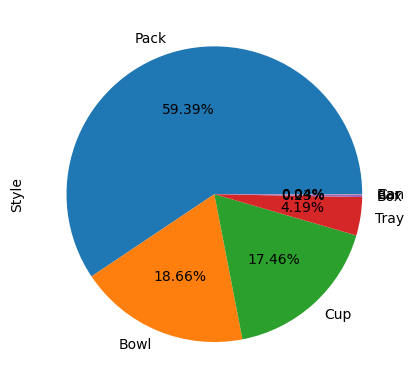

In [27]:
# Explore the distribution of the feature variable 'style'
train['Style'].value_counts().plot(kind='pie',autopct = '%1.2f%%')


ANALYSING WHICH COUNTRY HAS THE MOST AND LEAST RAMEN REVIEW

---




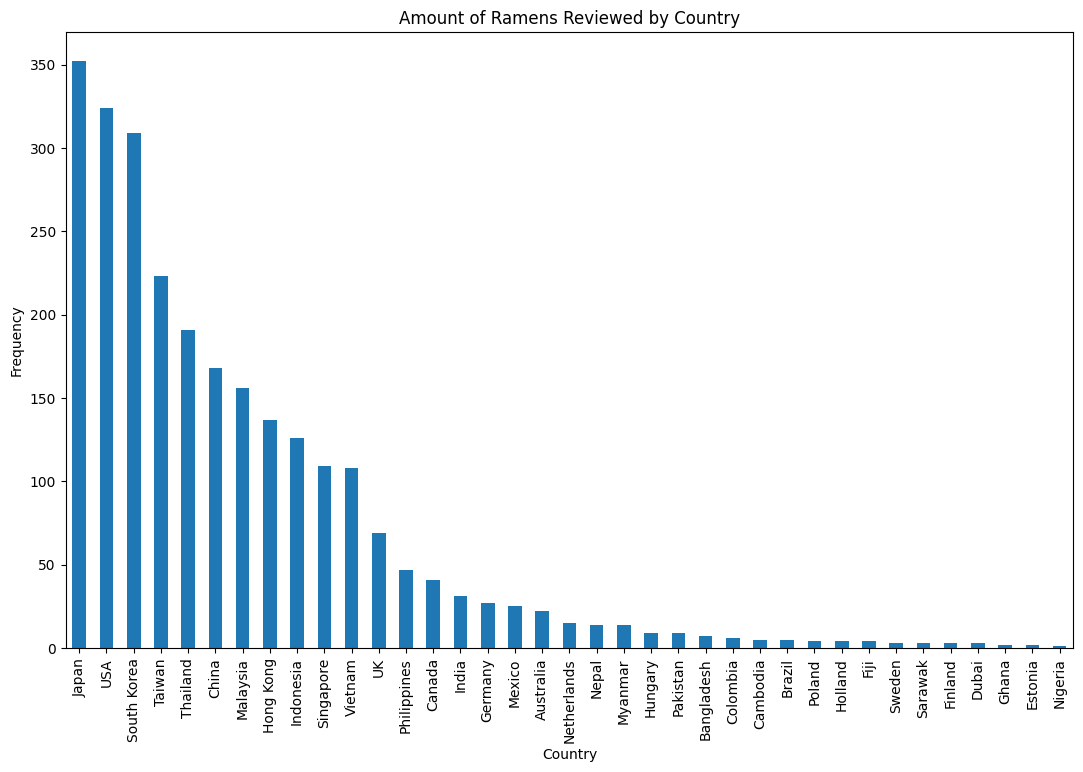

In [28]:
train['Country'].value_counts().plot(kind='bar', figsize=(13,8))
plt.xlabel('Country')
plt.ylabel('Frequency')
plt.title('Amount of Ramens Reviewed by Country');




*   JAPAN is the highly reviewed Country
*   NIGERIA is the least reviewed Country






ANALYSING TOP 5 RAMEN BRANDS

---



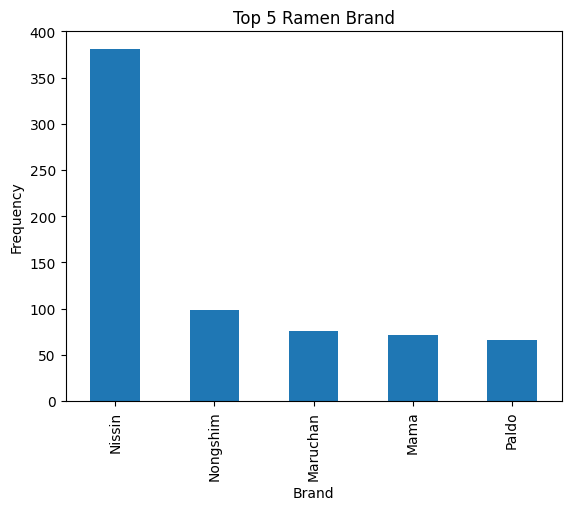

In [29]:
plt.xlabel('Brand')
plt.ylabel('Frequency')
plt.title('Top 5 Ramen Brand');
brand_counts = train['Brand'].value_counts().nlargest(5).plot(kind='bar')

DATA TRANSFORMATION
---


---



ENCODING VARIABLES




In [30]:
# Encoding the variables using sklearn.preprocessor 

def encode(df):
  le=LabelEncoder()
  for i in df.columns:
    if train[i].dtype == 'object':
      train[i]= le.fit_transform(df[i])
  return df

In [31]:
encode(train)

,Brand,Variety,Style,Country,Rating
0,190,2187,4,18,3.75
1,119,1441,5,32,1.00
2,192,453,4,35,2.25
3,336,707,5,32,2.75
4,38,1952,5,16,3.75
...,...,...,...,...,...
2575,329,848,1,36,3.50
2576,332,1509,5,33,1.00
2577,332,2250,5,33,2.00
2578,332,2246,5,33,2.00


In [32]:
train.dtypes

Brand        int64
Variety      int64
Style        int64
Country      int64
Rating     float64
dtype: object

In [33]:
train.skew()

Brand     -0.084489
Variety    0.018212
Style     -1.301443
Country   -0.591776
Rating    -1.098318
dtype: float64

**IQR** *- Interquartile Range*:


---


 Measure of spread in a dataset.

 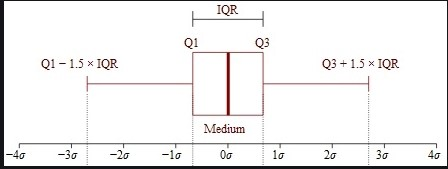
 
 The formula:
  
       IQR = Q3 - Q1

TREATING SKWENESS USING IQR

---




In [34]:
for x in ['Style']:
    q75,q25 = np.percentile(train.loc[:,x],[75,25])
    intr_qr = q75-q25
 
    max = q75+(1.5*intr_qr)
    min = q25-(1.5*intr_qr)
 
    train.loc[train[x] < min,x] = np.nan
    train.loc[train[x] > max,x] = np.nan

In [35]:
for x in ['Brand']:
    q75,q25 = np.percentile(train.loc[:,x],[75,25])
    intr_qr = q75-q25
 
    max = q75+(1.5*intr_qr)
    min = q25-(1.5*intr_qr)
 
    train.loc[train[x] < min,x] = np.nan
    train.loc[train[x] > max,x] = np.nan

In [36]:
for x in ['Rating']:
    q75,q25 = np.percentile(train.loc[:,x],[75,25])
    intr_qr = q75-q25
 
    max = q75+(1.5*intr_qr)
    min = q25-(1.5*intr_qr)
 
    train.loc[train[x] < min,x] = np.nan
    train.loc[train[x] > max,x] = np.nan

In [37]:
for x in ['Country']:
    q75,q25 = np.percentile(train.loc[:,x],[75,25])
    intr_qr = q75-q25
 
    max = q75+(1.5*intr_qr)
    min = q25-(1.5*intr_qr)
 
    train.loc[train[x] < min,x] = np.nan
    train.loc[train[x] > max,x] = np.nan

In [38]:
train.skew()

Brand     -0.084489
Variety    0.018212
Style     -0.366978
Country   -0.591776
Rating    -0.281976
dtype: float64

The 'Rating', 'Country', 'Brand', 'Style' columns has a negative skewness value, which indicates that it has a long tail to the left

In [39]:
train.isnull().sum()

Brand        0
Variety      0
Style      488
Country      0
Rating     132
dtype: int64

REPLACING THE MISSING VALUES


---





In [40]:
#Categorical variable data preparation and Missing value inputation

train['Style']=np.where(train['Style'].isna(),train['Style'].mode(dropna=True),train['Style'])
train['Rating']=np.where(train['Rating'].isna(),train['Rating'].mode(dropna=True),train['Rating'])

In [41]:
train.isnull().sum()

Brand      0
Variety    0
Style      0
Country    0
Rating     0
dtype: int64

GREAT! NOW WE HAVE A CLEAN DATASET LETS JUMP ON CREATING PREDICTIVE MODEL...

---



# SPLIT THE TRAIN AND TEST DATA

---



In [43]:
x=train.drop(['Rating'],axis=1)
y=train['Rating']


In [44]:
print(x.shape)
print(y.shape)

(2578, 4)
(2578,)


In [45]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [46]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)


(2062, 4)
(2062,)
(516, 4)
(516,)


In [47]:
train.dtypes

Brand      float64
Variety      int64
Style      float64
Country    float64
Rating     float64
dtype: object

In [48]:
def report_train(actual,predicted):
  mse_train = mean_squared_error(actual,predicted)
  r2_train = r2_score(actual,predicted)
  print("Results")
  print("-------------------------------")
  print("MSE on training data: {:.2f}".format(mse_train))
  print("R^2 score on training data: {:.2f}".format(r2_train))
 

In [49]:
def report_test(actual,predicted): 
  mse_test = mean_squared_error(actual,predicted)  
  r2_test = r2_score(actual,predicted)
  print("Results")
  print("-------------------------------")
  print("MSE on testing data: {:.2f}".format(mse_test))
  print("R^2 score on testing data: {:.2f}".format(r2_test))


# LINEAR REGRESSION

---



Provides a linear relationship between an independent variable and a dependent variable to predict the outcome of future events.

In [50]:
# Fit the Linear Regression model
lr = LinearRegression()
lr.fit(x_train, y_train)

# Make predictions on training and testing data
preds_lr_train = lr.predict(x_train)
preds_lr_test = lr.predict(x_test)

In [51]:
report_train(y_train,preds_lr_train)

Results
-------------------------------
MSE on training data: 0.60
R^2 score on training data: 0.01


In [52]:
report_test(y_test,preds_lr_test)

Results
-------------------------------
MSE on testing data: 0.56
R^2 score on testing data: 0.01


Mean Squared Error (MSE) is a measure of the difference between the actual values and the predicted values of a regression mode.







*   R^2 ranges between 0 and 1
          1 indicating a perfect fit 
          0 indicating no relationship between the dependent and independent variables.





* A lower MSE indicates better performance of the model( closer to the actual values)

* A higher R2 denotes the better performance of the model

# DESICION TREE


---




non-parametric supervised learning method,Predicts the value of a target variable by learning simple decision rules inferred from the data features

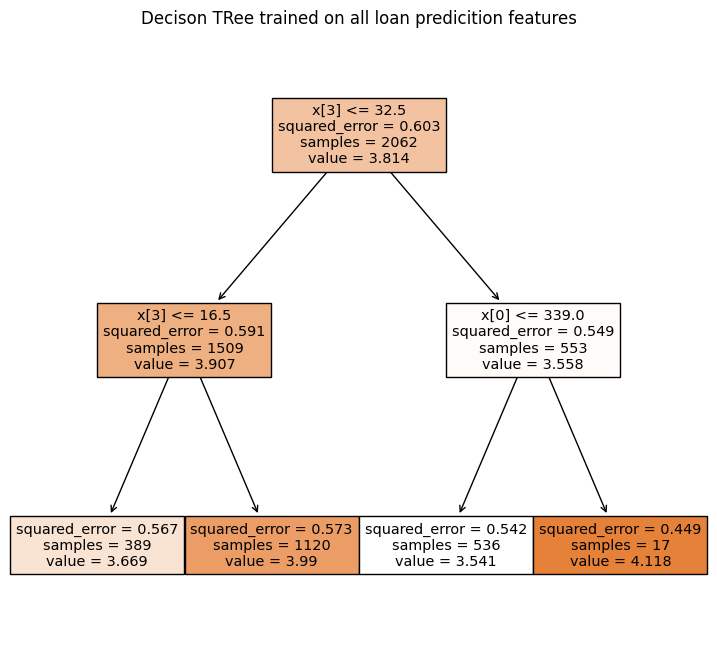

In [60]:
from sklearn.tree import plot_tree
plt.figure(figsize=(9,8))
clf=DecisionTreeRegressor(max_depth=2).fit(x_train,y_train)
plot_tree(clf,filled=True)
plt.title("Decison TRee trained on all loan predicition features")
plt.show()

In [107]:
# Fit the DecisionTree Regression model
dtree=DecisionTreeRegressor(max_depth=55,min_samples_split=2,random_state=0)
dtree.fit(x_train,y_train)

# Make predictions on training and testing data
preds_dtree_train = dtree.predict(x_train)
preds_dtree_test = dtree.predict(x_test)

In [108]:
report_train(y_train,preds_dtree_train)

Results
-------------------------------
MSE on training data: 0.00
R^2 score on training data: 1.00


In [109]:
report_test(y_test,preds_dtree_test)

Results
-------------------------------
MSE on testing data: 0.83
R^2 score on testing data: -0.46


# RANDOM FOREST

---



It number of classifying decision trees on various sub-samples of the dataset and uses averaging to improve the predictive accuracy and control over-fitting

In [64]:
# Fit the Random Forest Regressor model
rf = RandomForestRegressor(n_estimators = 112,verbose = 1)
rf.fit(x_train, y_train)

# Make predictions on training and testing data
preds_rf_train = rf.predict(x_train)
preds_rf_test = rf.predict(x_test)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 112 out of 112 | elapsed:    0.6s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 112 out of 112 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 112 out of 112 | elapsed:    0.0s finished


In [65]:
report_train(y_train,preds_rf_train)

Results
-------------------------------
MSE on training data: 0.08
R^2 score on training data: 0.87


In [66]:
report_test(y_test,preds_rf_test)

Results
-------------------------------
MSE on testing data: 0.55
R^2 score on testing data: 0.04


# ADA BOOSTING

---



Begins by fitting a regressor on the original dataset and then fits additional copies of the regressor on the same dataset

In [125]:
# Define the model
ada = AdaBoostRegressor(n_estimators=250,learning_rate=0.5)
ada.fit(x_train, y_train)

# Make predictions on training and testing data
preds_ada_train = ada.predict(x_train)
preds_ada_test = ada.predict(x_test)


In [126]:
report_train(y_train,preds_ada_train)

Results
-------------------------------
MSE on training data: 0.55
R^2 score on training data: 0.09


In [127]:
report_test(y_test,preds_ada_test)

Results
-------------------------------
MSE on testing data: 0.54
R^2 score on testing data: 0.05


# KNN


---



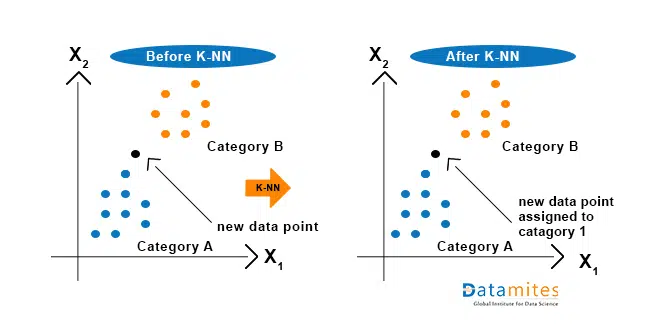

In [70]:
# Define the model
knn=KNeighborsRegressor(n_neighbors=5,weights='distance',p=3)
knn.fit(x_train, y_train)

# Make predictions on training and testing data
preds_knn_train = knn.predict(x_train)
preds_knn_test = knn.predict(x_test)

In [71]:
report_train(y_train,preds_knn_train)

Results
-------------------------------
MSE on training data: 0.00
R^2 score on training data: 1.00


In [72]:
report_test(y_test,preds_knn_test)

Results
-------------------------------
MSE on testing data: 0.63
R^2 score on testing data: -0.11
